# Session 7, Logistic Regression

## The Logistic Classifier

Regression techniques are typically used for predicting the real-valued output. But what if the output is discrete and even binary - 0 and 1 - i.e. what if we are dealing with a binary classification problem based on the real-valued input variables? 

Consider a training sample of size $N$ for a binary output variable 
$${\displaystyle y = }
\left\{ \begin{array}{l l} 
{1} & \quad \text{event happened }\\ 
{0} & \quad \text{event not happened } \\
\end{array} \right.
$$
and $n$ regressors $x^j$: 
$$
X=\{x_i, i=1..N\}=\{x_i^j, i=1..N, j=1..n\},\ Y=\{y_i, i=1..N\}.
$$ 

As before, instead of trying to predict the spefic value of $y$, we admit its uncertainty considering it a binary random variable, trying to predict its probability distribution (Bernoulli as the only meaningfull one for a binary variable):

$$
P(y|x,\beta)=Bern(y|\mu(x,\beta))
$$

A simplest suggestion for $\mu$ would be a linear model:

$$
\mu(x,\beta)=x\beta,
$$

however as $\mu=P(d=1)$ is the probability, it can only take values between 0 to 1, while there is no good way to ensure that the linear form $x\beta$ takes value within this interval. This could be corrected by considering 
$$
\mu(x,\beta)=f(x\beta),
$$
where $f$ is a certain function taking values only between 0 and 1. As for this function $f$, one can select a sigmoid function
$$
f(x)=\sigma(x)=\frac{e^x}{1+e^x}=\frac{1}{1+e^{-x}}.
$$
Sigmoid function always takes values within the interval $(0,1)$. This way 

$$
{\displaystyle P(y=1) = \sigma(x\beta)=\frac{\exp(x\beta)}{1+\exp(x\beta)}}=\frac{1}{1+\exp(-x\beta)}
$$$$
\displaystyle P(y=0) = 1-P(y=1)=\frac{1}{1+\exp(x\beta)}
$$

Then the likelihood of getting observed values of the output variable $y_i$ corresponding to the inputs $x_i$ can be defined as
$$
L=\prod\limits_i P(y=y_i|x_i,\beta),
$$
while log-likelihood is
$$
log(L)=\sum\limits_i log\left(P(y=y_i|x_i,\beta)\right)=\sum\limits_i y_i log\left(P(y=1|x_i,\beta)\right)+
\sum\limits_i (1-y_i)log\left(P(y=0|x_i,\beta)\right)=
$$$$
-\sum\limits_i log\left(1+exp((2 y_i-1)x_i\beta)\right).
$$
Then
$$
\beta=argmin_{\beta} \sum\limits_i log\left(1+exp((2 y_i-1)x_i\beta)\right).
$$
The above optimization problem can no longer be solved in the closed analytic form, but instead a multivariate iterational numerical optimization heuristics, such as various gradient decent methods, could be applied. 

In [48]:
#import all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.decomposition import PCA
import statsmodels.formula.api as smf
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\Jonathan\Anaconda2\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [50]:
#set colormap
pylab.rcParams['image.cmap'] = 'RdYlGn'

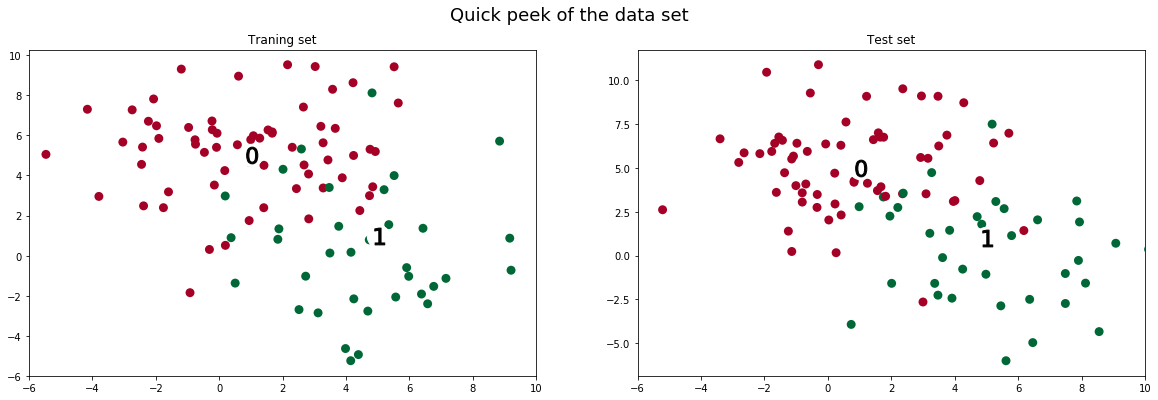

In [51]:
# generate some random 2d data points around two centroid points (1,5) and (5,1)
# classified based on which of the centroids was used, (1,5) label 0 and (5,1) with label 1
n = 100
random.seed(2016)
label = np.random.binomial(1, 0.4, size = 2*n)  # Bernoulli is binomial with n = 1
x1 = np.array([1,5])[label] + np.random.normal(0, 2.5, size = 2*n)
x2 = np.array([5,1])[label] + np.random.normal(0, 2.5, size = 2*n)


#visualization
fig1 = plt.figure(figsize = (20,6))
plt.suptitle("Quick peek of the data set", fontsize = 18)
ax1, ax2 = fig1.add_subplot(121), fig1.add_subplot(122)
ax1.scatter(x1[:n], x2[:n], lw = 0, s = 80, c = label[:n])
ax2.scatter(x1[n:], x2[n:], lw = 0, s = 80, c = label[n:])
ax1.set(title = 'Traning set', xlim = [-6,10])
ax2.set(title = 'Test set', xlim = [-6,10])

ax1.scatter([1,5], [5,1], marker='o', c="w", s=500)
ax2.scatter([1,5], [5,1], marker='o', c="w", s=500)
for i, c in enumerate([1,5]):
    ax1.scatter(c, 6-c, marker='$%d$'%i, s=280, color = 'k')
    ax2.scatter(c, 6-c, marker='$%d$'%i, s=280, color = 'k')

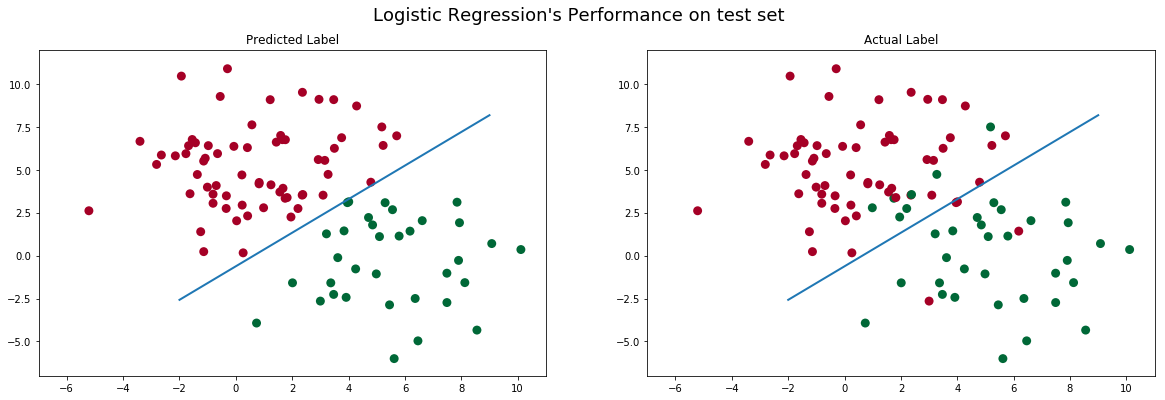

In [52]:
#learn logistic regression over the training sample
logit = LogisticRegression(C=1e6)
# C is an inverse regularization constant. More detail when we consider Bayesian inference, 
# for now lets just mention that higher C mean no regularization
logit.fit(np.c_[x1[:n], x2[:n]],label[:n])

#apply to the validation sample
labelPred = logit.predict(np.c_[x1[n:], x2[n:]])
labelActual = label[n:]

fig2 = plt.figure(figsize = (20,6))
plt.suptitle("Logistic Regression's Performance on test set", fontsize = 18)
ax1, ax2 = fig2.add_subplot(121), fig2.add_subplot(122)

#decision boundary
xplot = np.linspace(-2,9,200)
yplot = -(logit.intercept_[0] + logit.coef_[0][0]*xplot)/logit.coef_[0][1]
ax1.plot(xplot,yplot,lw = 2)
ax2.plot(xplot,yplot,lw = 2)

ax1.set(title='Predicted Label', xlim = [-7,11], ylim = [-7,12])
ax2.set(title='Actual Label', xlim = [-7,11], ylim = [-7,12])
ax1.scatter(x1[n:], x2[n:], lw = 0, s = 80, c = labelPred)
ax2.scatter(x1[n:], x2[n:], lw = 0, s = 80, c = labelActual)
plt.show()

In [53]:
np.c_

In [5]:
labelPred[0:10]

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [6]:
logitProbability = logit.predict_proba(np.c_[x1[n:], x2[n:]])[:,1]
logitProbability[0:10]

array([  5.26369139e-01,   9.46030131e-03,   3.58776743e-02,
         9.93907023e-01,   1.58984337e-01,   2.08996732e-01,
         3.47194256e-01,   2.52849575e-03,   4.17861491e-04,
         2.19166146e-02])

In [7]:
# This is how predicted label was created
logitProbability[0:10]>0.5

array([ True, False, False,  True, False, False, False, False, False, False], dtype=bool)

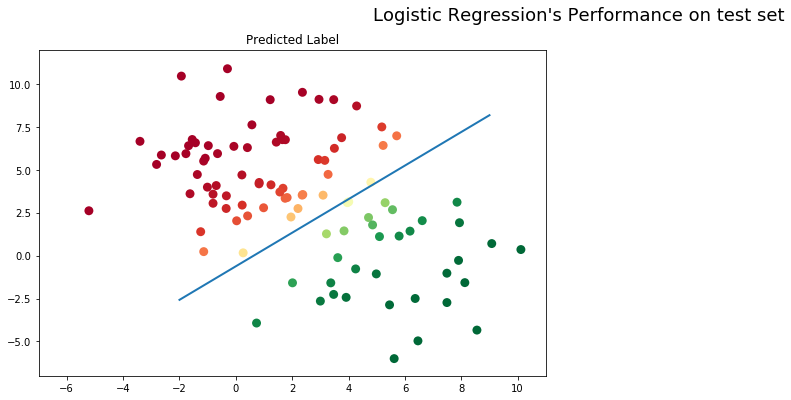

In [8]:
#visualize the prediction label probabilities 
fig2 = plt.figure(figsize = (20,6))
plt.suptitle("Logistic Regression's Performance on test set", fontsize = 18)
ax1 = fig2.add_subplot(121)

#decision boundary
ax1.plot(xplot,yplot,lw = 2)
ax2.plot(xplot,yplot,lw = 2)

ax1.set(title='Predicted Label', xlim = [-7,11], ylim = [-7,12])
ax1.scatter(x1[n:], x2[n:], lw = 0, s = 80, c = logitProbability)
plt.show()

## Confusion matrix

Fit of the binary classificator over the selected test set can be characterized by the confusion matrix
$$
\left[\begin{array}{c|c}TP&FN\\
\hline
FP&TN\end{array}\right]
$$
with
* $TP$ - number of true positives (correctly classified positives ($y_i=1$)), 
* $FP$ - number of false positives (observed negatives ($y_i=0$) incorrectly classified as positives ($y_i=1$)), 
* $FN$ - number of false negatives (observed positives ($y_i=1$) incorrectly classified as negatives ($y_i=0$)), 
* $TN$ - number of true negatives (correctly classified negatives ($y_i=0$)).

In relative terms the following quantities are often considered:

* Precision or positive predictive value (fraction of true positive classifications among all actual positive observations):
$$
PPV=\frac{TP}{TP+FP},
$$
* Sensitivity or recall or true positive rate (fraction of true positives among all positive classifications):
$$
TPR=\frac{TP}{TP+FN},
$$
* Accuracy (fraction of true classifications among all instances considered)
$$
ACC=\frac{TP+TN}{TP+TN+FP+FN}.
$$

In [9]:
#compute TP,FP,FN,TN for the above classification
TP = sum((labelPred==1)&(labelActual==1))
FP = sum((labelPred==1)&(labelActual==0))
FN = sum((labelPred==0)&(labelActual==1))
TN = sum((labelPred==0)&(labelActual==0))

#compute precision, accuracy and recall
Acc = 100.0 * (TP+TN)/(TP+TN+FP+FN)
Rec = 100.0 * TP/(TP+FN)
Prec= 100.0 * TP/(TP+FP)
print('Precision = %.2f%%\nAccuracy = %.2f%%\nRecall = %.2f%%'%(Prec,Acc,Rec))

Precision = 88.24%
Accuracy = 89.00%
Recall = 81.08%


In [10]:
print(confusion_matrix(labelPred, labelActual))
print('\nTP = %d, TN = %d, FP = %d, FN = %d'%(TP,TN,FP,FN))

[[59  7]
 [ 4 30]]

TP = 30, TN = 59, FP = 4, FN = 7


All three are quite high, indicating our model's good performance, thanks to the separability of the data

## Practice
### Interpreting logit coeffients and statistics
Example - learning the probability of school admission based on two exams

In [3]:
admission = pd.read_csv('data/admission.csv')  
admission.head()

,exam1,exam2,admit
0,34,78,0
1,30,43,0
2,35,72,0
3,60,86,1
4,79,75,1


In [45]:
admission.shape

(100, 3)

In [4]:
# split sample into training and test ones
np.random.seed(100)
Index = np.random.binomial(1, 0.6, size = len(admission))
train, test = admission[Index==1], admission[Index==0]
#train, test 

In [68]:
# Q1. Perform the similar analysis, run the logistic regression on the training set
# Q2. Predict admittance on you test set, compare with the actual labels
# Q3. Calculate the confusion matrix, how well is our model performing?
# Q4. Predict the probability of acceptance for a student with exam scores 75 and 53.

#### Q1. Perform the similar analysis, run the logistic regression on the training set
###### Q1 Response

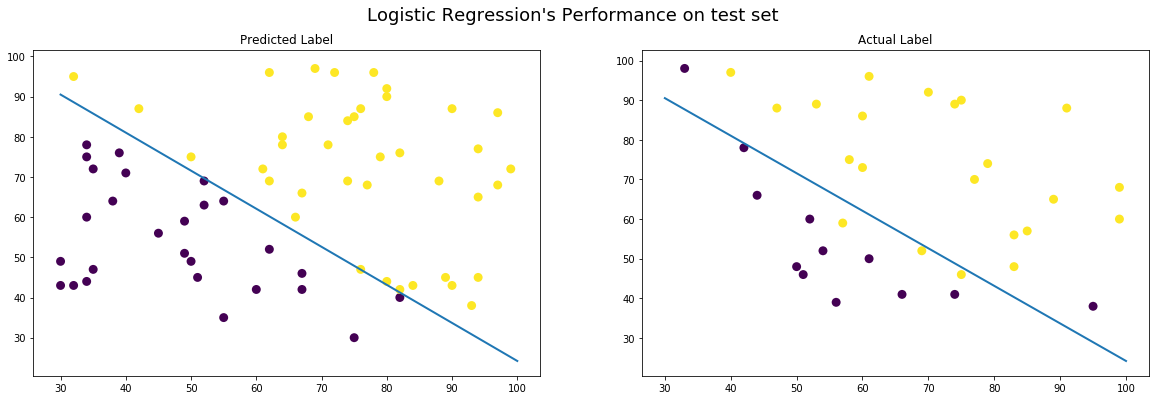

In [6]:
n=50
#learn logistic regression over the training sample
logit = LogisticRegression(C=1e6)
# C is an inverse regularization constant. More detail when we consider Bayesian inference, 
# for now lets just mention that higher C mean no regularization
logit.fit(train[['exam1','exam2']],train.admit)

#apply to the validation sample
labelPred = logit.predict(np.c_[train.exam1, train.exam2])
labelActual = test.admit

fig2 = plt.figure(figsize = (20,6))
plt.suptitle("Logistic Regression's Performance on test set", fontsize = 18)
ax1, ax2 = fig2.add_subplot(121), fig2.add_subplot(122)

#decision boundary
xplot = np.linspace(30,100,200)
yplot = -(logit.intercept_[0] + logit.coef_[0][0]*xplot)/logit.coef_[0][1]
ax1.plot(xplot,yplot,lw = 2)
ax2.plot(xplot,yplot,lw = 2)

ax1.set(title='Predicted Label')#, xlim = [-7,11], ylim = [-7,12])
ax2.set(title='Actual Label')#, xlim = [-7,11], ylim = [-7,12])
ax1.scatter(train.exam1, train.exam2, lw = 0, s = 80, c = labelPred)
ax2.scatter(test.exam1, test.exam2, lw = 0, s = 80, c = labelActual)
plt.show()

#### Q2. Predict admittance on you test set, compare with the actual labels

#### Q2 Response

In [13]:
logitProbability = logit.predict_proba(test[['exam1','exam2']])[:,1]


In [7]:
logit.predict_proba?

In [14]:
logitProbability[0:10]

array([ 0.99850909,  0.99992411,  0.37465465,  0.92173031,  0.99600563,
        0.39506017,  0.99997785,  0.99974331,  0.0016383 ,  0.04597433])

In [12]:
test[['exam1','exam2']].head()

,exam1,exam2
3,60,86
6,61,96
7,75,46
10,95,38
15,53,89


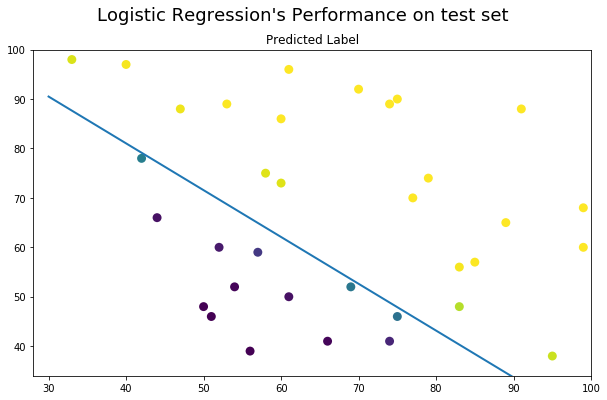

In [20]:
#visualize the prediction label probabilities 
fig2 = plt.figure(figsize = (10,6))
plt.suptitle("Logistic Regression's Performance on test set", fontsize = 18)
ax1 = fig2.add_subplot(111)

#decision boundary
ax1.plot(xplot,yplot,lw = 2)
ax2.plot(xplot,yplot,lw = 2)

ax1.set(title='Predicted Label', xlim = [28,100], ylim = [34,100])
ax1.scatter(test.exam1, test.exam2, lw = 0, s = 80, c = logitProbability)
plt.show()

In [34]:
labPred =  1 * (logitProbability > 0.5)
labActual = test.admit
len(labPred), len(labActual)

(34, 34)

In [35]:
#compute TP,FP,FN,TN for the above classification
TP = sum((labPred==1)&(labActual==1))
FP = sum((labPred==1)&(labActual==0))
FN = sum((labPred==0)&(labActual==1))
TN = sum((labPred==0)&(labActual==0))

#compute precision, accuracy and recall
Acc = 100.0 * (TP+TN)/(TP+TN+FP+FN)
Rec = 100.0 * TP/(TP+FN)
Prec= 100.0 * TP/(TP+FP)
print('Precision = %.2f%%\nAccuracy = %.2f%%\nRecall = %.2f%%'%(Prec,Acc,Rec))

Precision = 90.48%
Accuracy = 85.29%
Recall = 86.36%


In [36]:
print(confusion_matrix(labPred, labActual))
print('\nTP = %d, TN = %d, FP = %d, FN = %d'%(TP,TN,FP,FN))

[[10  3]
 [ 2 19]]

TP = 19, TN = 10, FP = 2, FN = 3


In [ ]:
Precision 

In [45]:
round(19. / (19 + 2),4)

0.9048

In [ ]:
Sensitivity

In [44]:
round(19. / (19 + 3),4)

0.8636

In [ ]:
Accuracy

In [43]:
round((19.+10.) / (19 + 10 + 2 + 3),4)

0.8529

In [46]:
x = np.array([-1, 0, 2])
y = np.array([3,1,2])

In [47]:
model = sm.ols(y,x).fit

NameError: name 'sm' is not defined

## Find Manhattan in 311 data

In [72]:
# read the curated data - number of complains per 1 sq mile cell and complain type as well as coordinates of the cells
data311 = pd.read_csv( 'data/cellaggr311.csv' , index_col=0 )
cells311 = pd.read_csv( 'data/311cells.csv' , index_col=0 )
print(data311.head())
print(cells311.head())

   Cell        CompType  Count
1     0  Adopt-A-Basket      1
2   624  Adopt-A-Basket      2
3   714  Adopt-A-Basket      1
4   724  Adopt-A-Basket      1
5   905  Adopt-A-Basket      1
   Cell          x          y  m
1     0 -74.244686  40.506004  0
2     1 -74.231099  40.508049  0
3     2 -74.213415  40.510914  0
4   100 -74.243625  40.515905  0
5   101 -74.231455  40.519908  0


In [73]:
# create a rectangular matrix of cell (raws) profiles by compain types (columns); create dictionaries and order raw metadata
import numbers
cells={}
cellinv={}
cellnum=0
complains={}
compinv={}
compnum=0
cx={}
cy={}
mh={}
X=numpy.zeros(shape=(10000,200))
for i in data311.index:
    z=data311.Cell[i];
    if not (z in cells.keys()):
          cells[z]=cellnum
          cellinv[cellnum]=z
          ci=list(cells311.Cell).index(z)
          cx[cellnum]=list(cells311.x)[ci]
          cy[cellnum]=list(cells311.y)[ci]
          mh[cellnum]=list(cells311.m)[ci]
          cellnum+=1
    comp=data311.CompType[i] 
    if not (comp in complains.keys()):
          complains[comp]=compnum
          compinv[compnum]=comp
          compnum+=1
    X[cells[z]][complains[comp]]=data311.Count[i]
X=X[0:cellnum,0:compnum]
C=sum(X,1)

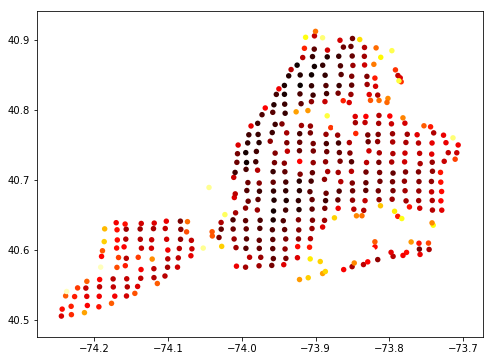

In [74]:
# visualize cells by complaining activity
c = log(C)
c = 1-c/max(c)
x=[cx[z] for z in range(0,cellnum)]
y=[cy[z] for z in range(0,cellnum)]
max(c)
plt.figure(figsize=(8,6))
plt.scatter (x,y,s=30,c=c,cmap='hot',lw=0)

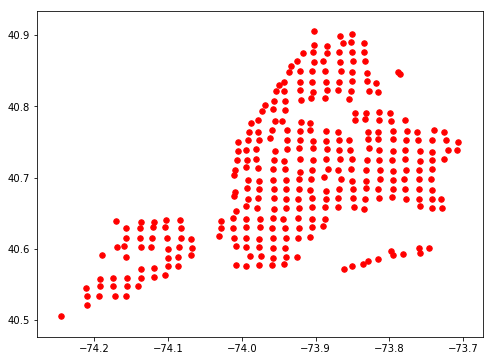

In [75]:
#filter only cells with over 500 complains in total
x500=[cx[z] for z in find(C>500)]
y500=[cy[z] for z in find(C>500)]
plt.figure(figsize=(8,6))
plt.scatter (x500,y500,s=30,c='red')

In [76]:
#normalize the matrix to deal with the relative complain type frequencies
X=matrix(X)
for z in range(0,cellnum):
    X[z,:]=X[z,:]/sum(X[z,:])
m=mean(X,0)    
for i in range(0,compnum):
    X[:,i]=(X[:,i]-m[0,i])
X500=X[C>500,:]

In [77]:
pca = PCA(0.999)
P = pca.fit_transform(X500)

(0.4, 1)

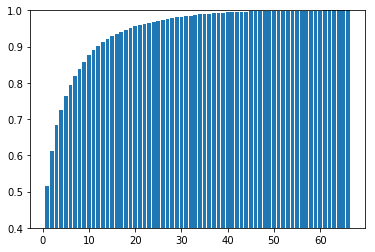

In [78]:
#visualize amount of information covered by PCAs and take 19 leading ones covering 95% of the entire infomation
s=pca.explained_variance_ratio_
sc=cumsum(np.array(s)/sum(np.array(s)))
plt.bar(range(1,len(sc)+1),sc)
plt.ylim((0.4,1))

In [79]:
#train logistic regression over the leading PC's 
#logit=sklearn.linear_model.LogisticRegression(C=1, tol=0.001, fit_intercept=True, max_iter=100,penalty='l1')
#logit.fit(Pl,np.array(m500))
#me=logit.predict(Pl)
m500=[mh[z] for z in find(C>500)]


logreg = LogisticRegression(C=1e6)
logreg.fit(P[:,0:4], m500)
Z = logreg.predict(P[:,0:4])

print('Errors={0}'.format(sum(Z!=m500)))

Errors=0


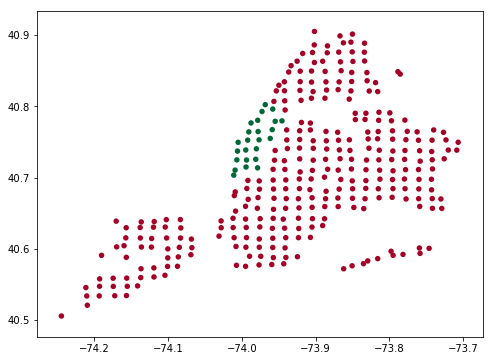

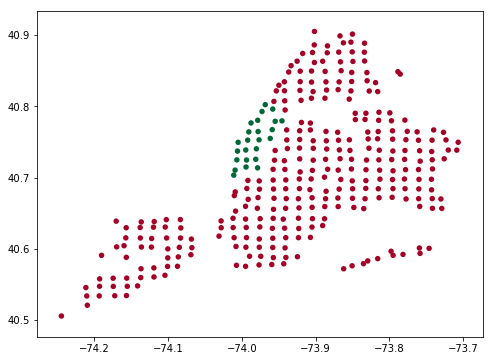

In [80]:
# visualize the definition and the model prediction of where Manhattan is
plt.figure(figsize=(8,6))
plt.scatter (x500,y500,s=30,c=m500,lw=0)
plt.figure(figsize=(8,6))
plt.scatter (x500,y500,s=30,c=Z,lw=0)

## Multiclass classification. Iris dataset with sklearn

In [81]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

In [25]:
X[0:10,:]

array([[ 5.1,  3.5],
       [ 4.9,  3. ],
       [ 4.7,  3.2],
       [ 4.6,  3.1],
       [ 5. ,  3.6],
       [ 5.4,  3.9],
       [ 4.6,  3.4],
       [ 5. ,  3.4],
       [ 4.4,  2.9],
       [ 4.9,  3.1]])

In [26]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [27]:
logreg = LogisticRegression(C=1e6)
logreg.fit(X, Y)
Z = logreg.predict(X)

In [28]:
Z

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1,
       2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [29]:
logreg.predict_proba(X)[0:10,:]

array([[ 0.9058278 ,  0.06816546,  0.02600675],
       [ 0.76463298,  0.21637883,  0.01898819],
       [ 0.84690907,  0.14219123,  0.0108997 ],
       [ 0.81565415,  0.17561146,  0.00873439],
       [ 0.92962835,  0.05111669,  0.01925496],
       [ 0.93572768,  0.02145501,  0.04281731],
       [ 0.9063771 ,  0.08584048,  0.00778242],
       [ 0.89000779,  0.08867379,  0.02131842],
       [ 0.74405067,  0.25043904,  0.00551028],
       [ 0.80282796,  0.17863107,  0.01854097]])

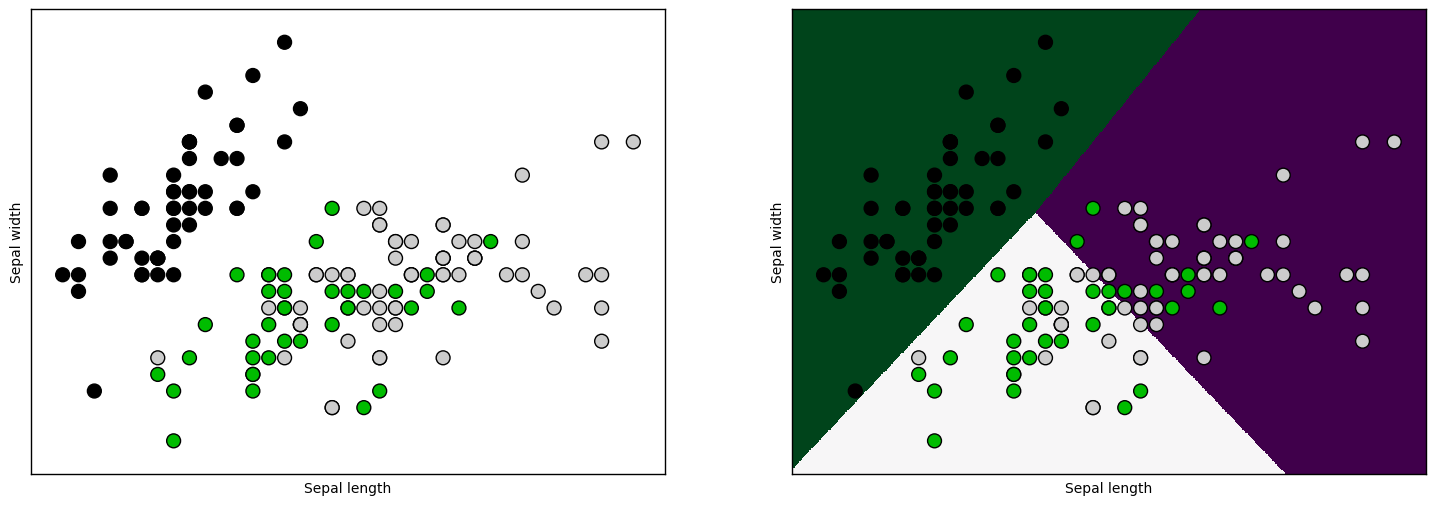

In [30]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max] times [y_min, y_max].
x_min, x_max = X[:, 0].min() - .2, X[:, 0].max() + .2
y_min, y_max = X[:, 1].min() - .2, X[:, 1].max() + .2
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 600), np.linspace(y_min, y_max, 600))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

fig4 = plt.figure(3, figsize=(18, 6))
ax1, ax2 = fig4.add_subplot(121), fig4.add_subplot(122)

# Plot the dots with labels only
ax1.scatter(X[:, 0], X[:, 1], c=Y, s = 100, edgecolors='k', cmap=plt.cm.spectral)
ax1.set(xlabel = 'Sepal length', ylabel='Sepal width', xticks=(), yticks=(),
       xlim = ((xx.min(), xx.max())), ylim = ((yy.min(), yy.max())))

# Plot the decision boundaries and the partition areas
ax2.pcolormesh(xx, yy, Z, cmap = plt.cm.PRGn_r)
ax2.scatter(X[:, 0], X[:, 1], c=Y, s = 100, edgecolors='k', cmap=plt.cm.spectral)
ax2.set(xlabel = 'Sepal length', ylabel='Sepal width', xticks=(), yticks=(),
       xlim = ((xx.min(), xx.max())), ylim = ((yy.min(), yy.max())))
plt.show()